In [6]:
# Install necessary libraries
!pip install prophet pycaret
!pip install seaborn matplotlib statsmodels pandas numpy
!pip install openpyxl

In [28]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from pandas import Series
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files

In [30]:
# df = pd.read_excel('express-store[73].xlsx', engine='openpyxl')

In [31]:
df = pd.read_excel('express-store[73].xlsx')


In [32]:
# Data preprocessing
df['assignment_date'] = pd.to_datetime(df['assignment_date'])
df['variant'] = df['experiment_group'].apply(lambda x: 'Control' if 'control' in x else ('Variant 1' if 'variant 1' in x else 'Variant 2'))


#===========================================
#**Customer Behavior Analysis: Total Spend, Orders Placed, Avg Order Value**
#===========================================


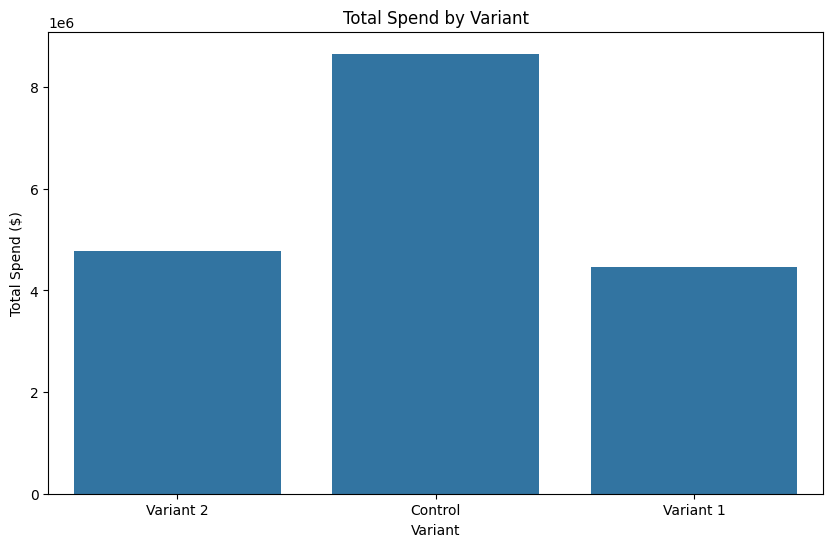

In [37]:
# Visualizing Total Spend by Variant
plt.figure(figsize=(10, 6))
sns.barplot(x='variant', y='total_spend', data=df, estimator=np.sum, errorbar=None)
plt.title('Total Spend by Variant')
plt.ylabel('Total Spend ($)')
plt.xlabel('Variant')
plt.show()

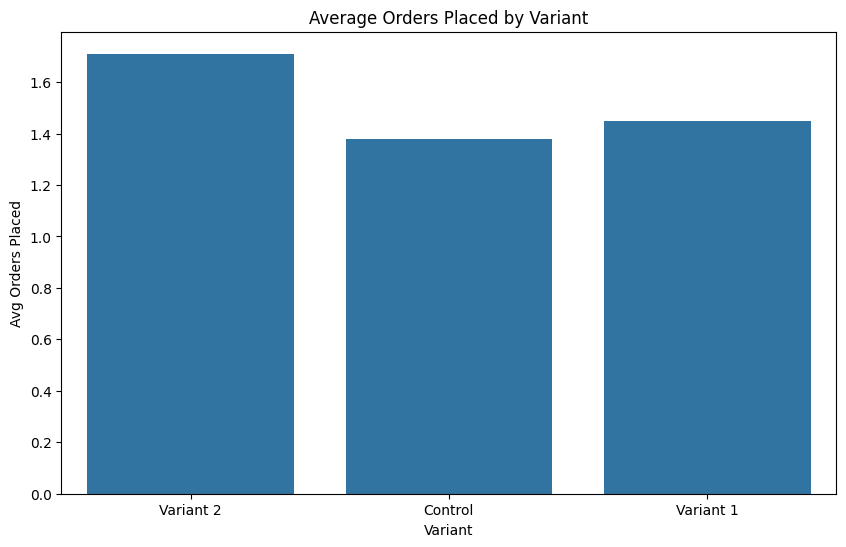

In [38]:
# Visualizing Orders Placed by Variant
plt.figure(figsize=(10, 6))
sns.barplot(x='variant', y='orders_placed', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Orders Placed by Variant')
plt.ylabel('Avg Orders Placed')
plt.xlabel('Variant')
plt.show()

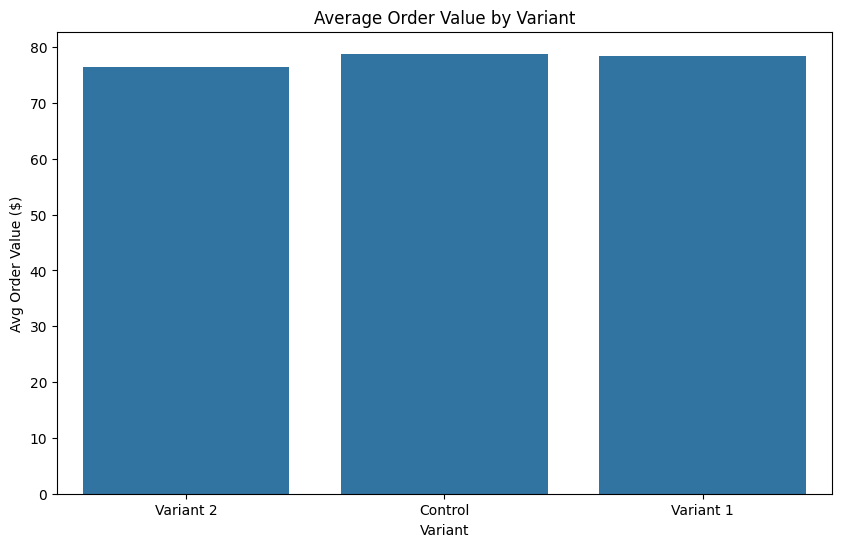

In [40]:
# Visualizing Average Order Value by Variant
plt.figure(figsize=(10, 6))
sns.barplot(x='variant', y='avg_order_value', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Order Value by Variant')
plt.ylabel('Avg Order Value ($)')
plt.xlabel('Variant')
plt.show()

# ===========================================
# **Statistical Significance Testing: T-test for Total Spend & Orders Placed**
# ===========================================

In [42]:
# T-test for Total Spend (Control vs Variant 1)

control_group = df[df['variant'] == 'Control']['total_spend']
variant1_group = df[df['variant'] == 'Variant 1']['total_spend']
ttest_control_v1_spend = ttest_ind(control_group, variant1_group)

# T-test for Total Spend (Control vs Variant 2)

variant2_group = df[df['variant'] == 'Variant 2']['total_spend']
ttest_control_v2_spend = ttest_ind(control_group, variant2_group)

# T-test for Orders Placed (Control vs Variant 1)

ttest_control_v1_orders = ttest_ind(df[df['variant'] == 'Control']['orders_placed'], df[df['variant'] == 'Variant 1']['orders_placed'])

# T-test for Orders Placed (Control vs Variant 2)

ttest_control_v2_orders = ttest_ind(df[df['variant'] == 'Control']['orders_placed'], df[df['variant'] == 'Variant 2']['orders_placed'])

# Display results
print("T-test (Total Spend, Control vs Variant 1):", ttest_control_v1_spend)
print("T-test (Total Spend, Control vs Variant 2):", ttest_control_v2_spend)
print("T-test (Orders Placed, Control vs Variant 1):", ttest_control_v1_orders)
print("T-test (Orders Placed, Control vs Variant 2):", ttest_control_v2_orders)


T-test (Total Spend, Control vs Variant 1): TtestResult(statistic=-1.796725681662682, pvalue=0.07238321016583911, df=74847.0)
T-test (Total Spend, Control vs Variant 2): TtestResult(statistic=-8.577325347900377, pvalue=9.892287718023722e-18, df=74864.0)
T-test (Orders Placed, Control vs Variant 1): TtestResult(statistic=-5.671460711892637, pvalue=1.42105211404086e-08, df=74847.0)
T-test (Orders Placed, Control vs Variant 2): TtestResult(statistic=-26.0458886749473, pvalue=6.931031174708672e-149, df=74864.0)


# ===========================================
# **Sample Size Check: Count of Customers in Each Variant Group**
# ===========================================

Sample Sizes by Variant:
 variant
Control      49715
Variant 1    25134
Variant 2    25151
Name: user_id, dtype: int64


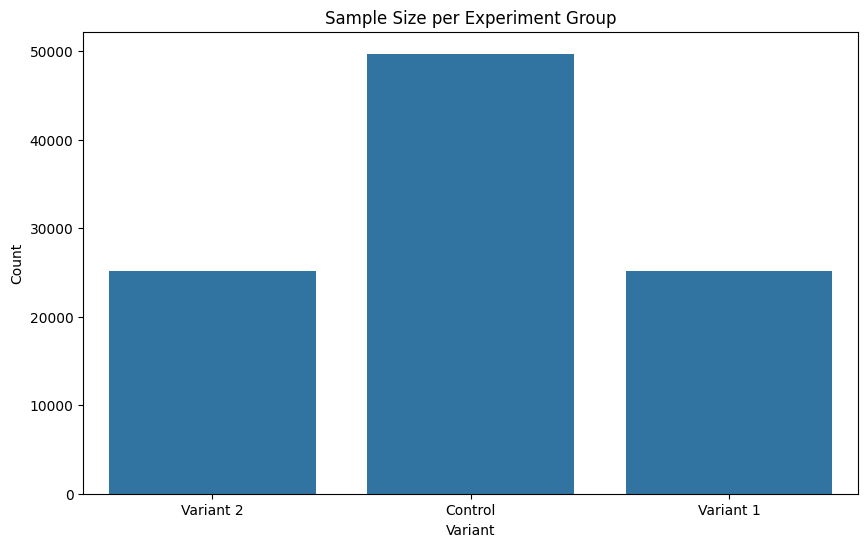

In [43]:
sample_size = df.groupby('variant')['user_id'].count()
print("Sample Sizes by Variant:\n", sample_size)

# Visualizing sample size per variant
plt.figure(figsize=(10, 6))
sns.countplot(x='variant', data=df)
plt.title('Sample Size per Experiment Group')
plt.xlabel('Variant')
plt.ylabel('Count')
plt.show()

# ===========================================
# **Unit Economics: Cost per Delivery and Revenue Cutoff Analysis**
# ===========================================


In [44]:
# Fixed delivery cost per order (e.g., $5)
fixed_delivery_cost = 5

# Calculating profit at different revenue cutoffs (5%, 10%, and 20%)
df['revenue_5_percent'] = df['total_spend'] * 0.05
df['revenue_10_percent'] = df['total_spend'] * 0.10
df['revenue_20_percent'] = df['total_spend'] * 0.20

df['profit_5_percent'] = df['revenue_5_percent'] - (df['orders_placed'] * fixed_delivery_cost)
df['profit_10_percent'] = df['revenue_10_percent'] - (df['orders_placed'] * fixed_delivery_cost)
df['profit_20_percent'] = df['revenue_20_percent'] - (df['orders_placed'] * fixed_delivery_cost)

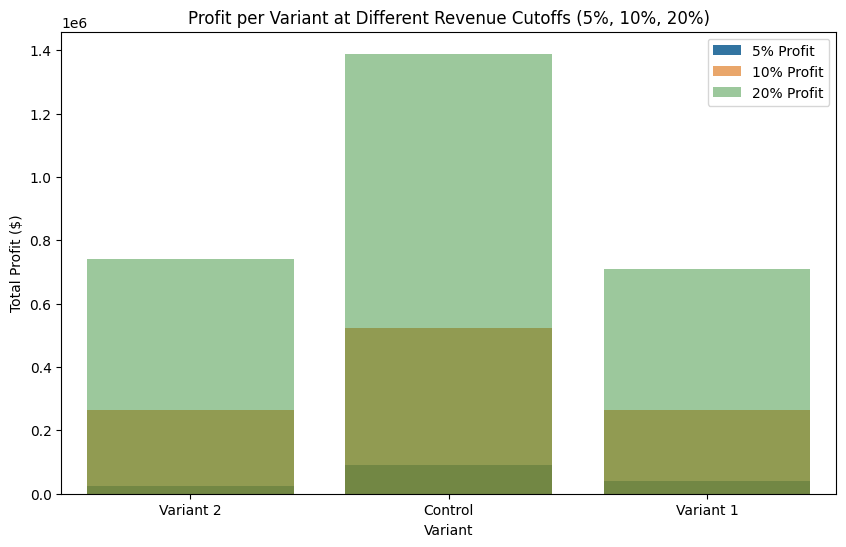

In [46]:
# Visualizing profit per variant at different revenue cutoffs
plt.figure(figsize=(10, 6))
sns.barplot(x='variant', y='profit_5_percent', data=df, estimator=np.sum, errorbar=None, label='5% Profit')
sns.barplot(x='variant', y='profit_10_percent', data=df, estimator=np.sum, errorbar=None, label='10% Profit', alpha=0.7)
sns.barplot(x='variant', y='profit_20_percent', data=df, estimator=np.sum, errorbar=None, label='20% Profit', alpha=0.5)
plt.title('Profit per Variant at Different Revenue Cutoffs (5%, 10%, 20%)')
plt.ylabel('Total Profit ($)')
plt.xlabel('Variant')
plt.legend()
plt.show()

# ===========================================
# **Customer Segmentation: Loyalty and Express Membership**
# ===========================================

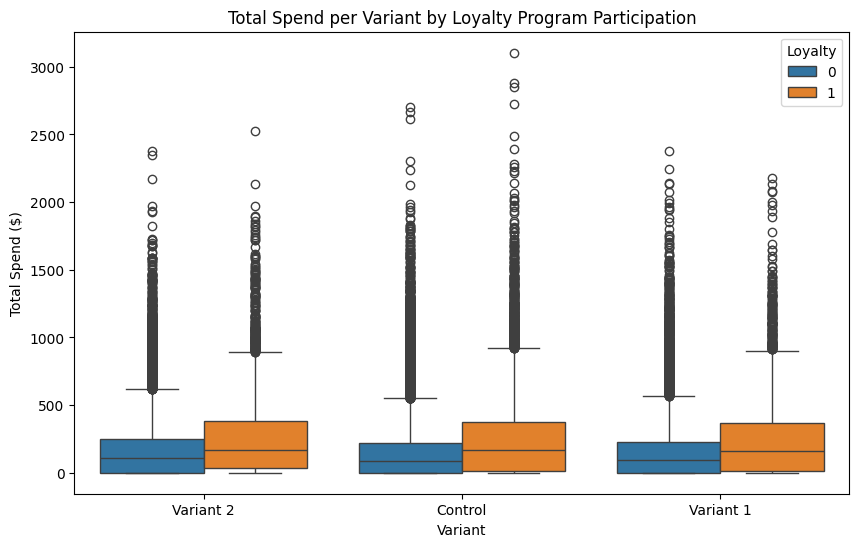

In [47]:
# Segment 1: Loyalty vs Total Spend per Variant
plt.figure(figsize=(10, 6))
sns.boxplot(x='variant', y='total_spend', hue='loyalty', data=df)
plt.title('Total Spend per Variant by Loyalty Program Participation')
plt.xlabel('Variant')
plt.ylabel('Total Spend ($)')
plt.legend(title='Loyalty')
plt.show()

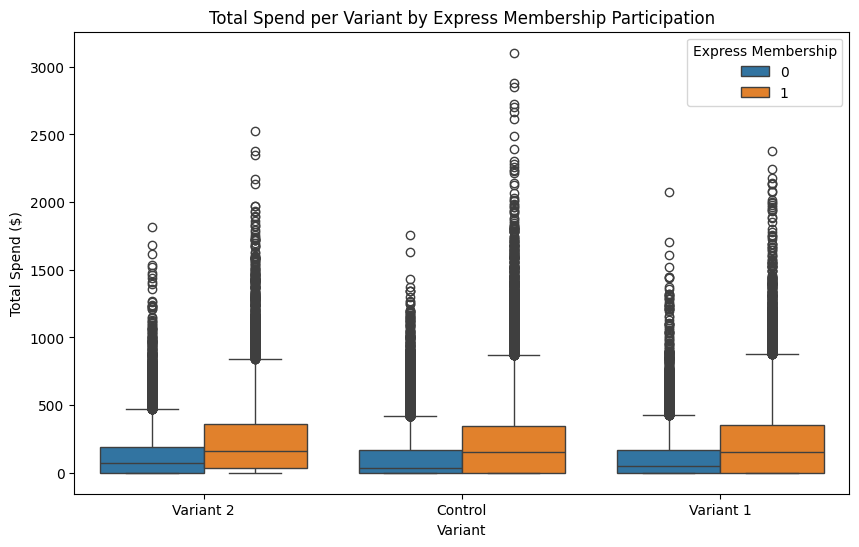

In [48]:
# Segment 2: Express Membership vs Total Spend per Variant
plt.figure(figsize=(10, 6))
sns.boxplot(x='variant', y='total_spend', hue='express', data=df)
plt.title('Total Spend per Variant by Express Membership Participation')
plt.xlabel('Variant')
plt.ylabel('Total Spend ($)')
plt.legend(title='Express Membership')
plt.show()

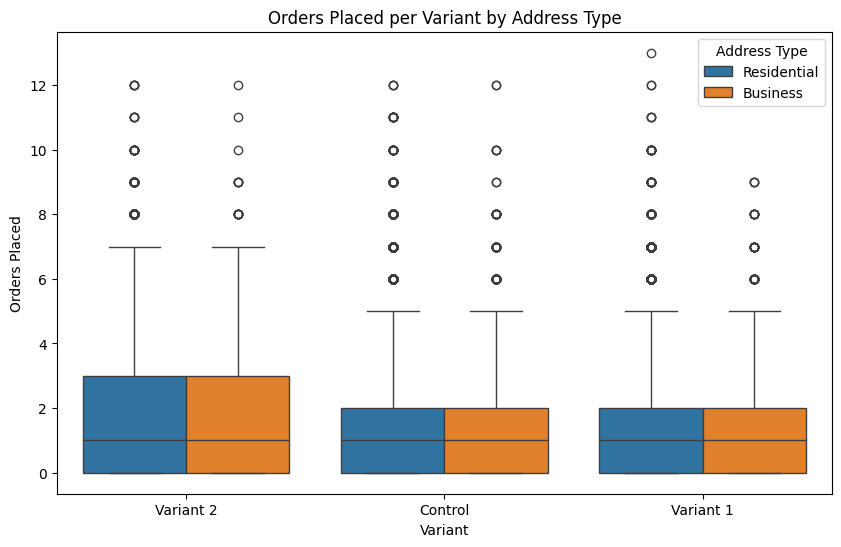

In [49]:
# Segment 3: Address Type vs Orders Placed per Variant
plt.figure(figsize=(10, 6))
sns.boxplot(x='variant', y='orders_placed', hue='address_type', data=df)
plt.title('Orders Placed per Variant by Address Type')
plt.xlabel('Variant')
plt.ylabel('Orders Placed')
plt.legend(title='Address Type')
plt.show()

# ===========================================
# **Scalability: Order Frequency vs Order Value**
# ===========================================


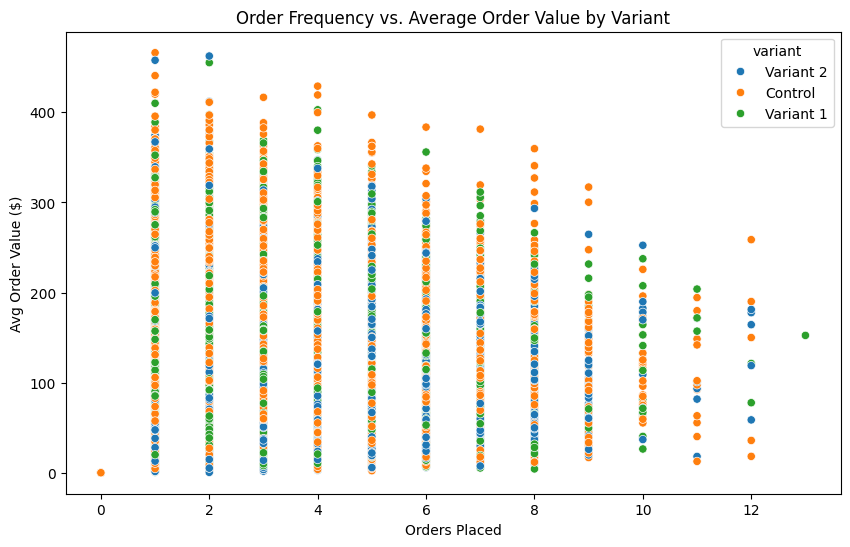

In [50]:
# Scatter plot to visualize how often smaller orders are placed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='orders_placed', y='avg_order_value', hue='variant', data=df)
plt.title('Order Frequency vs. Average Order Value by Variant')
plt.xlabel('Orders Placed')
plt.ylabel('Avg Order Value ($)')
plt.show()

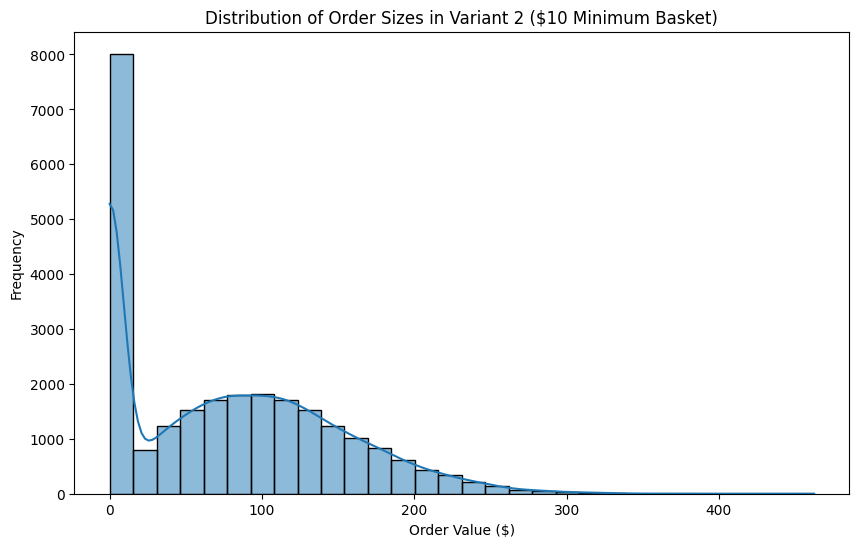

In [51]:
# Histogram of Order Sizes to Understand Frequency of Small Orders in Variant 2
plt.figure(figsize=(10, 6))
sns.histplot(df[df['variant'] == 'Variant 2']['avg_order_value'], bins=30, kde=True)
plt.title('Distribution of Order Sizes in Variant 2 ($10 Minimum Basket)')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.show()

In [52]:
# Delivery cost simulation (e.g., impact of high volume of small orders in Variant 2)
# Assume we have variable costs (e.g., driver time, fuel cost) that increase with small orders
df['small_orders'] = df['avg_order_value'].apply(lambda x: 1 if x < 35 else 0)  # Count small orders (less than $35)

# Calculating additional costs for small orders (e.g., $3 per small order for fuel, driver wage)
additional_cost_per_small_order = 3
df['additional_cost'] = df['small_orders'] * additional_cost_per_small_order

# Total cost per variant (fixed cost + additional cost)
df['total_cost'] = (df['orders_placed'] * fixed_delivery_cost) + df['additional_cost']


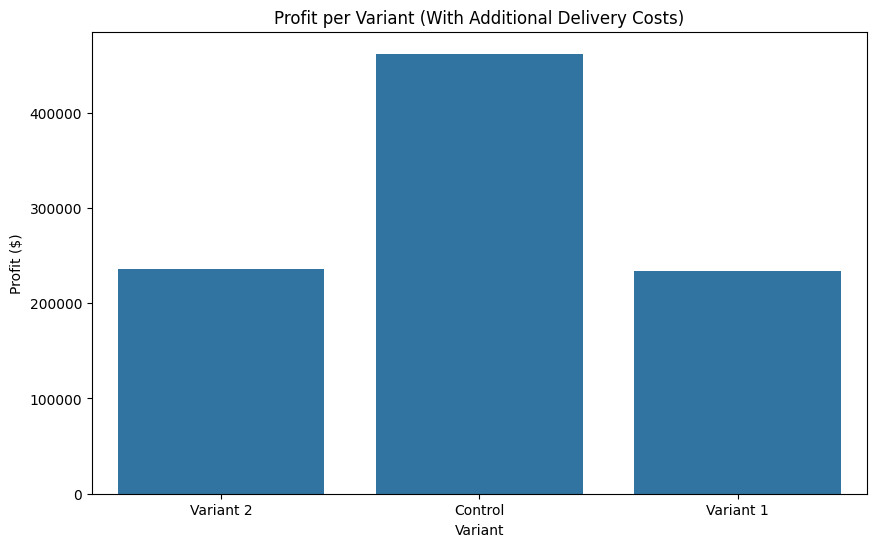

In [54]:
# Profit visualization including additional costs
df['profit_with_additional_cost'] = df['revenue_10_percent'] - df['total_cost']  # Example at 10% revenue share
plt.figure(figsize=(10, 6))
sns.barplot(x='variant', y='profit_with_additional_cost', data=df, estimator=np.sum, errorbar=None)
plt.title('Profit per Variant (With Additional Delivery Costs)')
plt.ylabel('Profit ($)')
plt.xlabel('Variant')
plt.show()


# ===========================================
# **More Analysis**
# ===========================================


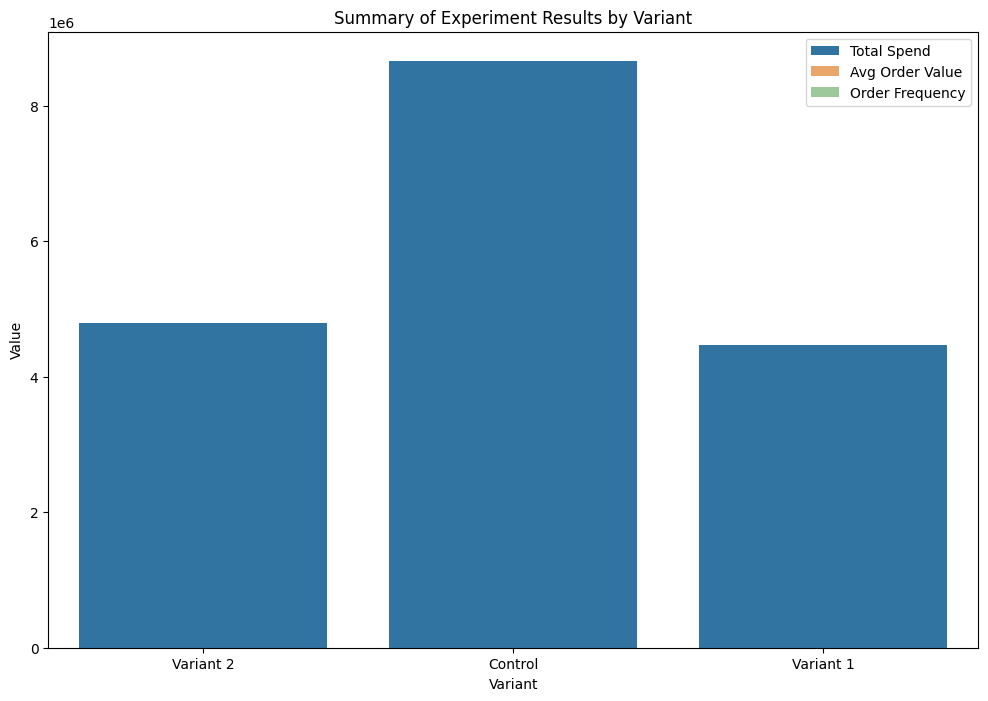

In [56]:
# Summary Bar Chart for Total Spend, Average Order Value, and Order Frequency
plt.figure(figsize=(12, 8))
sns.barplot(x='variant', y='total_spend', data=df, estimator=np.sum, errorbar=None, label='Total Spend')
sns.barplot(x='variant', y='avg_order_value', data=df, estimator=np.mean, errorbar=None, label='Avg Order Value', alpha=0.7)
sns.barplot(x='variant', y='orders_placed', data=df, estimator=np.mean, errorbar=None, label='Order Frequency', alpha=0.5)
plt.title('Summary of Experiment Results by Variant')
plt.ylabel('Value')
plt.xlabel('Variant')
plt.legend()
plt.show()

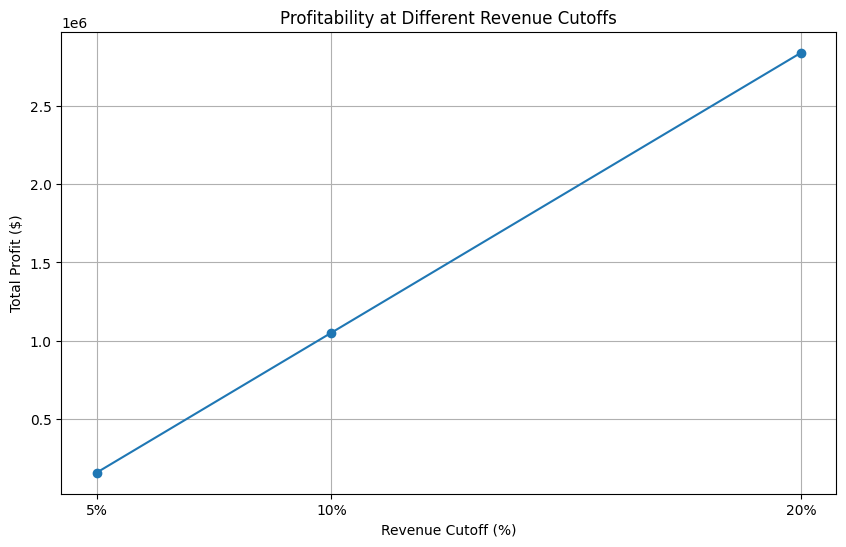

In [57]:
# Profitability Analysis at Different Revenue Cutoffs
revenue_cutoffs = [0.05, 0.10, 0.20]
profits = [df['profit_5_percent'].sum(), df['profit_10_percent'].sum(), df['profit_20_percent'].sum()]

plt.figure(figsize=(10, 6))
plt.plot(revenue_cutoffs, profits, marker='o')
plt.title('Profitability at Different Revenue Cutoffs')
plt.xlabel('Revenue Cutoff (%)')
plt.ylabel('Total Profit ($)')
plt.xticks(revenue_cutoffs, ['5%', '10%', '20%'])
plt.grid(True)
plt.show()

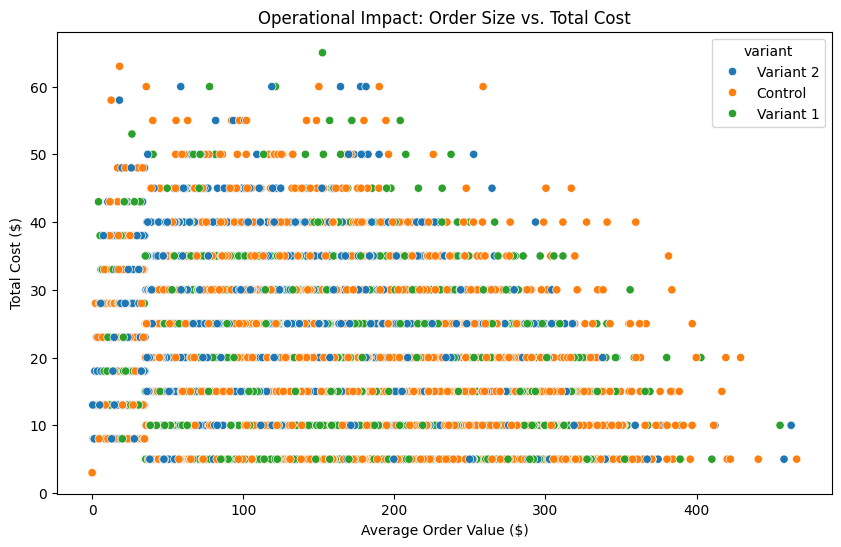

In [58]:
# Operational Impact Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_order_value', y='total_cost', hue='variant', data=df)
plt.title('Operational Impact: Order Size vs. Total Cost')
plt.xlabel('Average Order Value ($)')
plt.ylabel('Total Cost ($)')
plt.show()